In [406]:
import os
import numpy as np
import pandas as pd

In [407]:
# Import necessary libraries
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

# Problem 1

Application of the Perceptron in Classification of Normal and Shouted Speech using MFCC features. These features are extracted from speech samples of a number of speakers uttering a few sentences normally or by shouting. The features are divided into train-test splits and are made available in two csv files (use dataset of previous assignment). You are tasked to learn a discriminative model to classify normal and shouted speech. This example uses Perceptron as a discriminative model. Consider the .csv file “Train_file.csv” containing 86060 instances of 61- dimensional arrays. The first 60 dimensions of the array contain the feature values for a particular instance and the last dimension contains its label. The label can be either ’0’ or ‘1’.

## (a)

The perceptron input 𝒙∈ℝ60 and predicted output 𝑦̂∈ (0,1) are related as follows.

𝑢=𝝎𝑇𝒙+𝑏 ;𝝎∈ℝ60

𝑦̂={1+exp(−𝑢)}−1

Learn the weight vector 𝒙 and bias 𝑏 from the train dataset (Train_file.csv). Do not use any Scikit-Learn functions. Write your own functions for perceptron learning.

In [408]:
path="D:\Semester 2\Machine Learning Lab\9"
os.chdir(path)

In [409]:
files=os.listdir()[-2:]

In [458]:
train=np.loadtxt(path+'\\'+files[1],delimiter=',')

In [459]:
# Features in rows and records in rows
train=train.T

In [460]:
# First 60 rows are features and last one row is label for that column
x_train=train[:-1,:]
y_train=train[-1,:]

In [461]:
d=x_train.shape[0]
n=x_train.shape[1]

In [462]:
w=np.random.rand(d,1)
b=np.random.rand(1)

In [463]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [464]:
def forward(x):
    '''
    Perform forward propagation
    '''
    return sigmoid(w.T@x+b)[0] # Returns 2d-array with 1 row, we select the first row

In [467]:
def train_perceptron(iterations=1000,lr=0.01):
    # set lr =0.001 if does not work properly
    global w
    global b
    for i in range(iterations):
        y_hat=forward(x_train)
        grad_b=-(y_train*(1-y_hat)-(1-y_train)*y_hat).sum()
        grad_w=(-(y_train*(1-y_hat)-(1-y_train)*y_hat)*x_train).sum(axis=1).reshape(d,1)
        old_params=np.vstack((w,b))
        b=b-lr*grad_b
        w=w-lr*grad_w
        new_params=np.vstack((w,b))
        if np.linalg.norm(new_params-old_params)<=0.001:
            break
    return w,b

In [466]:
train_perceptron()

C:\Users\mohit\AppData\Local\Temp\ipykernel_37100\4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


(array([[ 112.6173429 ],
        [  36.96156262],
        [  37.67206008],
        [   5.7260605 ],
        [  22.9528445 ],
        [ -28.39203728],
        [ -51.4226641 ],
        [  22.91981787],
        [ -40.55077712],
        [ -38.34090098],
        [ -33.43606127],
        [ -63.02698095],
        [ -42.28555861],
        [ -78.60925023],
        [ -33.649294  ],
        [  36.47984289],
        [ -67.04883195],
        [  22.42095906],
        [  36.07109063],
        [ -42.58573651],
        [ -11.32771914],
        [ -26.65339837],
        [  30.8955769 ],
        [  -1.3792132 ],
        [   5.7665968 ],
        [ -10.48198757],
        [  -5.03434587],
        [  -7.39949525],
        [   4.1377589 ],
        [  43.59713173],
        [  24.54316373],
        [  12.31895686],
        [  54.4808658 ],
        [   7.19184557],
        [  11.6031604 ],
        [  14.11522951],
        [  -1.52781178],
        [  21.4896834 ],
        [  12.7139162 ],
        [  -5.20479651],


# (b)

Read “Test_file.csv” consisting of 21516 instances of 61 dimensional arrays. For each array, the first 60 dimensions contain the feature values for the test data and the last dimension contains its actual label. Predict the label of each data instance from the testing set using the learned perceptron and compare the predicted and actual labels. Report the class-wise F1-scores for both classes and the overall accuracy.

In [468]:
def predict(x):
    y_hat=forward(x)
    predicted=np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        if y_hat[i]>=0.5:
            predicted[i]=1
        else:
            predicted[i]=0
    return predicted

In [469]:
test=np.loadtxt(path+'\\'+files[0],delimiter=',')
test=test.T
x_test=test[:-1,:]
y_test=test[-1,:]

In [470]:
# Divide test data Class wise
class_0_test_indices=np.where(y_test==0)[0] # np.where returns a numpy array inside a tuple of length 1, so use index 0 to extract that array
class_1_test_indices=np.where(y_test==1)[0]

y_test_1=y_test[class_1_test_indices]
y_test_0=y_test[class_0_test_indices]

In [471]:
y_hat=predict(x_test)

C:\Users\mohit\AppData\Local\Temp\ipykernel_37100\4033946986.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [472]:
def confusion_matrix(y,y_pred):
    # 1 is negative , 0 is positive
    # TP 0 as 0
    # FP 1 as 0
    # TN 1 as 1
    # FN 0 as 1
    mat=np.zeros((2,2))
    zero_inds=(y==0)
    FN=y_pred[zero_inds].sum()
    TP=(1-y_pred[zero_inds]).sum()
    one_inds=(y==1)
    TN=y_pred[one_inds].sum()
    FP=(1-y_pred[one_inds]).sum()
    mat[0][0]=TP
    mat[0][1]=FN
    mat[1][0]=FP
    mat[1][1]=TN
    return mat

In [473]:
cm=confusion_matrix(y_test,y_hat)
cm

array([[ 9866.,   832.],
       [  743., 10075.]])

In [474]:
print(f"Accuracy is : {(cm[0][0]+cm[1][1])/cm.sum()}") 

Accuracy is : 0.9267986614612381


In [475]:
recall_0=(cm[0][0])/cm[0,:].sum()
recall_1=cm[1][1]/cm[1,:].sum()
precision_0=cm[0][0]/cm[:,0].sum()
precision_1=cm[1][1]/cm[:,1].sum()
print(f"Recall for class 0 is {recall_0}, and that of class 1 is {recall_1}")
print(f"Precision for class 0 is {precision_0}, and that of class 1 is {precision_1}")
f1_class_0=(2*precision_0*recall_0)/(precision_0+recall_0)
f1_class_1=(2*precision_1*recall_1)/(precision_1+recall_1)
print(f"F1-Score for class 0 is {f1_class_0} and that of class 1 is {f1_class_1}")

Recall for class 0 is 0.9222284539166199, and that of class 1 is 0.9313181734146793
Precision for class 0 is 0.9299651239513621, and that of class 1 is 0.9237187127532777
F1-Score for class 0 is 0.9260806307786174 and that of class 1 is 0.9275028768699655


# Problem 2
[Q2] Download the <a href="https://archive.ics.uci.edu/ml/datasets/MiniBooNE%2Bparticle%2Bidentification"> MiniBooNE </a> dataset from UIUC Machine Learning Repository. This dataset is imbalanced. First, sample 𝑛 number of samples (say 11000) from both the classes and set that aside as the test set 𝐷𝑡𝑠𝑡. Consider the remaining imbalanced data as the training set 𝐷𝑡𝑟𝑛.

In [427]:
data=np.loadtxt(r"C:\Users\mohit\IITG FIles\Machine Learning\8_Assignment_ML\MiniBooNE_PID.txt",skiprows=1)

# Few entries has -999 as values, replace them by nan
data=np.where(data==-999,np.nan,data)
# no of elements in each category
num_elems=np.loadtxt(r"C:\Users\mohit\IITG FIles\Machine Learning\8_Assignment_ML\MiniBooNE_PID.txt",max_rows=1,dtype=int)

In [428]:
data=data.T # Transpose data features are in the rows and each entry is in a column.

In [429]:
row_means = np.nanmean(data, axis=1)
data[np.isnan(data)] = np.take(row_means, np.isnan(data).nonzero()[0])

In [430]:
num_elems # First entry number of entries of signal, second number is number of entries of background

array([36499, 93565])

In [431]:
n1=num_elems[0]
n0=num_elems[1]
# Create vector of labels
y=np.hstack((np.ones(n1),np.zeros(n0)))

In [432]:
Dtst=np.hstack((data[:,:11000].copy(),data[:,n1:n1+11000].copy()))

In [433]:
Dtst_labels=np.hstack((y[:11000].copy(),y[n1:n1+11000].copy()))

In [434]:
Dtrn=np.hstack((data[:,11000:n1].copy(),data[:,n1+11000:].copy()))

In [435]:
Dtrn_labels=np.hstack((y[11000:n1].copy(),y[n1+11000:].copy()))

# (a)
Use the perceptron module in Scikit-learn python toolbox to learn a perceptron from 𝐷𝑡𝑟𝑛. Report the class-wise F1-scores of this perceptron on 𝐷𝑡𝑠𝑡.

In [436]:
clf = Perceptron(tol=1e-3, eta0=.1,random_state=0)
clf.fit(Dtrn.T, Dtrn_labels)

Perceptron(eta0=0.1)

In [437]:
Dtst_pred=clf.predict(Dtst.T)
Dtst_pred

array([1., 1., 1., ..., 0., 0., 0.])

In [438]:
# Calculate the class-wise F1-scores and overall accuracy
f1_scores = f1_score(Dtst_labels, Dtst_pred, average=None)
accuracy = accuracy_score(Dtst_labels, Dtst_pred)

In [439]:
print("F1-Scores: ", f1_scores)
print("Overall Accuracy: ", accuracy)

F1-Scores:  [0.73934682 0.56443878]
Overall Accuracy:  0.6738636363636363


# (b)
Balance the dataset 𝐷𝑡𝑟𝑛 using <a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.KMeansSMOTE.html">KMeansSmote</a> algorithm from the imbalanced-learn python tool box to generate the balanced training dataset 𝐷𝑡𝑟𝑛𝑏. Use the perceptron module in Scikit-learn python toolbox to learn a perceptron from 𝐷𝑡𝑟𝑛𝑏. Report the class-wise F1-scores of this perceptron on 𝐷𝑡𝑟𝑛.

In [440]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [441]:
from imblearn.over_sampling import KMeansSMOTE
from sklearn.cluster import MiniBatchKMeans

In [442]:
sm = KMeansSMOTE(
    kmeans_estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
Dtrnb,Dtrnb_labels  = sm.fit_resample(Dtrn.T, Dtrn_labels)

C:\Users\mohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [443]:
clf = Perceptron(tol=1e-3, eta0=.1,random_state=0)
clf.fit(Dtrnb, Dtrnb_labels)

Perceptron(eta0=0.1)

In [444]:
Dtrn_pred=clf.predict(Dtrn.T)
Dtrn_pred

array([1., 0., 1., ..., 0., 0., 1.])

In [445]:
Dtrn_labels

array([1., 1., 1., ..., 0., 0., 0.])

In [446]:
# Calculate the class-wise F1-scores and overall accuracy
f1_scores = f1_score(Dtrn_labels, Dtrn_pred, average=None)
accuracy = accuracy_score(Dtrn_labels, Dtrn_pred)

In [447]:
print("F1-Scores: ", f1_scores)
print("Overall Accuracy: ", accuracy)

F1-Scores:  [0.84808123 0.55503645]
Overall Accuracy:  0.7734953360971276


In [448]:
Dtst_pred=clf.predict(Dtst.T)
Dtst_pred

array([1., 1., 1., ..., 0., 0., 0.])

In [449]:
# Calculate the class-wise F1-scores and overall accuracy
f1_scores = f1_score(Dtst_labels, Dtst_pred, average=None)
accuracy = accuracy_score(Dtst_labels, Dtst_pred)

In [450]:
print("F1-Scores: ", f1_scores)
print("Overall Accuracy: ", accuracy)

F1-Scores:  [0.74977688 0.68124031]
Overall Accuracy:  0.7196363636363636


# (c) 
Report your observations on the two test performances. Reference: https://www.jmlr.org/papers/volume18/16-365/16-365.pdf

Due to imbalance dataset the accuracy obtained in (a) was not that good, the accuracy and f1 scores increased after we balanced the dataset in (b)

# Problem 3
Consider the MNIST Handwritten Digit Recognition dataset used in earlier assignments. Use the perceptron module in Scikit-learn python toolbox to learn a perceptron to perform 10 category classification over the given dataset. Use SoftMax as the activation function for the 10 output nodes. Report the class-wise F1-scores and the overall accuracy. Fold back the weight vectors of the 10 perceptrons as images and visualize the same

In [478]:
# Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int32)

In [479]:
# Split the data into training and testing sets
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

In [480]:
clf = Perceptron(tol=1e-3, eta0=0.1,random_state=0)
clf.fit(X_train, y_train)

Perceptron(eta0=0.1)

In [481]:
y_pred=clf.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [482]:
y_test

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: int32

In [483]:
# Calculate the class-wise F1-scores and overall accuracy
f1_scores = f1_score(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)

In [484]:
print("F1-Scores: ", f1_scores)
print("Overall Accuracy: ", accuracy)

F1-Scores:  [0.94695092 0.96700396 0.88910226 0.8562212  0.89989785 0.82299887
 0.93454936 0.91601562 0.79358289 0.8502316 ]
Overall Accuracy:  0.8897


In [485]:
clf.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

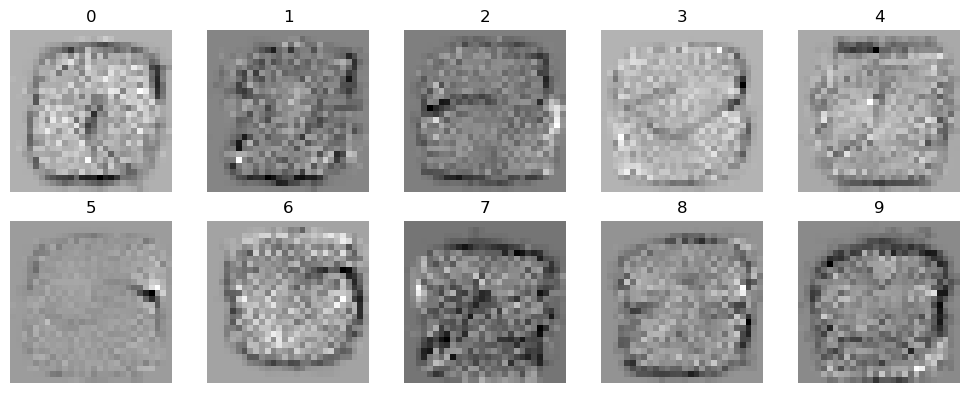

In [486]:
# Fold back the weight vectors of the 10 perceptrons as images and visualize them
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i in range(10):
    w = clf.coef_[i,:].reshape(28, 28)
    ax[i//5, i%5].imshow(w, cmap='gray')
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title(str(i))
plt.tight_layout()
plt.show()